# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the number of columns the notebook can display
pd.set_option('display.max_columns', 200)

In [2]:
house = pd.read_csv('housing.csv')

In [3]:
house.head(5)

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7049044568,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,1148.0,apartment,1078.0,3.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,w/d in unit,carport,https://images.craigslist.org/01616_daghmBUvTC...,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca
1,7049047186,https://reno.craigslist.org/apa/d/reno-reduced...,reno / tahoe,https://reno.craigslist.org,1200.0,condo,1001.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,w/d hookups,carport,https://images.craigslist.org/00V0V_5va0MkgO9q...,Conveniently located in the middle town of Ren...,39.5026,-119.789,ca
2,7043634882,https://reno.craigslist.org/apa/d/sparks-state...,reno / tahoe,https://reno.craigslist.org,1813.0,apartment,1683.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,w/d in unit,attached garage,https://images.craigslist.org/00t0t_erYqC6LgB8...,2BD | 2BA | 1683SQFTDiscover exceptional servi...,39.6269,-119.708,ca
3,7049045324,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,1095.0,apartment,708.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,w/d in unit,carport,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
4,7049043759,https://reno.craigslist.org/apa/d/reno-no-long...,reno / tahoe,https://reno.craigslist.org,289.0,apartment,250.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,laundry on site,NaN,https://images.craigslist.org/01616_fALAWFV8zQ...,"Move In Today: Reno Low-Cost, Clean & Furnishe...",39.5357,-119.805,ca


In [4]:
house.shape

(145450, 22)

In [5]:
house.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state'],
      dtype='object')

In [6]:
house.region.value_counts()

region
omaha / council bluffs     2725
denver                     2671
savannah / hinesville      2621
boulder                    2601
jacksonville               2580
                           ... 
saginaw-midland-baycity       5
muskegon                      4
battle creek                  3
upper peninsula               1
bemidji                       1
Name: count, Length: 148, dtype: int64

In [7]:
house.state.value_counts().head(8)

state
fl    31929
ca    15223
ga    13841
co    11294
il     9706
ks     7910
ia     7488
md     7451
Name: count, dtype: int64

In [8]:
house.type.unique()

array(['apartment', 'condo', 'house', 'duplex', 'townhouse', 'loft',
       'manufactured', 'cottage/cabin', 'flat', 'in-law', 'land',
       'assisted living', nan], dtype=object)

In [9]:
house.drop(columns=['id','url','lat','long','region_url','image_url',
                    'description', 'electric_vehicle_charge', 
                    'smoking_allowed','wheelchair_access'
                   ], inplace=True)

In [10]:
house[20000:20005]

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,comes_furnished,laundry_options,parking_options,state
20000,colorado springs,999.0,apartment,561.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN,co
20001,colorado springs,1350.0,apartment,701.0,1.0,1.0,1.0,1.0,0.0,w/d in unit,attached garage,co
20002,colorado springs,999.0,apartment,561.0,1.0,1.0,1.0,1.0,0.0,laundry in bldg,NaN,co
20003,colorado springs,1169.0,apartment,1109.0,3.0,2.0,1.0,1.0,0.0,NaN,no parking,co
20004,colorado springs,958.0,apartment,561.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN,co


In [11]:
house.parking_options.unique()

array(['carport', 'attached garage', nan, 'off-street parking',
       'detached garage', 'street parking', 'no parking', 'valet parking'],
      dtype=object)

In [12]:
house.laundry_options.unique()

array(['w/d in unit', 'w/d hookups', 'laundry on site', 'laundry in bldg',
       nan, 'no laundry on site'], dtype=object)

# Data Cleaning

In [13]:
house.dtypes

region              object
price              float64
type                object
sqfeet             float64
beds               float64
baths              float64
cats_allowed       float64
dogs_allowed       float64
comes_furnished    float64
laundry_options     object
parking_options     object
state               object
dtype: object

In [14]:
house.isna().sum()

region                 1
price                  1
type                   1
sqfeet                 1
beds                   1
baths                  1
cats_allowed           1
dogs_allowed           1
comes_furnished        1
laundry_options    32872
parking_options    56470
state                  1
dtype: int64

In [15]:
house['parking_options']=house.parking_options.fillna('no parking')
house['laundry_options'] = house.laundry_options.fillna('no laundry')

In [16]:
house.isna().sum()

region             1
price              1
type               1
sqfeet             1
beds               1
baths              1
cats_allowed       1
dogs_allowed       1
comes_furnished    1
laundry_options    0
parking_options    0
state              1
dtype: int64

# Feature Engineering

In [17]:
#fill missing values in 'cats_allowed' and 'dogs_allowed' columns with 0
house['cats_allowed'].fillna(0, inplace=True)
house['dogs_allowed'].fillna(0, inplace=True)

#convert 'cats_allowed' and 'dogs_allowed' columns to integers
house['cats_allowed'] = house['cats_allowed'].astype(int)
house['dogs_allowed'] = house['dogs_allowed'].astype(int)

#create a new column 'pets_allowed' in the pandas DataFrame 'house' that takes the value 1 if both 'cats_allowed' and 'dogs_allowed' are 1.
house['pets_allowed'] = (house['cats_allowed'] & house['dogs_allowed'])

# Drop the 'cats_allowed' and 'dogs_allowed' columns from the DataFrame
house.drop(['cats_allowed', 'dogs_allowed'], axis='columns', inplace=True)

In [18]:
house.head(8)

,region,price,type,sqfeet,beds,baths,comes_furnished,laundry_options,parking_options,state,pets_allowed
0,reno / tahoe,1148.0,apartment,1078.0,3.0,2.0,0.0,w/d in unit,carport,ca,1
1,reno / tahoe,1200.0,condo,1001.0,2.0,2.0,0.0,w/d hookups,carport,ca,0
2,reno / tahoe,1813.0,apartment,1683.0,2.0,2.0,0.0,w/d in unit,attached garage,ca,1
3,reno / tahoe,1095.0,apartment,708.0,1.0,1.0,0.0,w/d in unit,carport,ca,1
4,reno / tahoe,289.0,apartment,250.0,0.0,1.0,1.0,laundry on site,no parking,ca,1
5,reno / tahoe,1093.0,apartment,720.0,1.0,1.0,0.0,laundry in bldg,no parking,ca,1
6,reno / tahoe,935.0,apartment,661.0,1.0,1.0,0.0,laundry on site,off-street parking,ca,1
7,reno / tahoe,1095.0,apartment,708.0,1.0,1.0,0.0,w/d in unit,carport,ca,1


In [19]:
is_a_parking = ['carport', 'attached garage', 'off-street parking', 'detached garage', 'valet parking']
house.parking_options=house.parking_options.apply(lambda x: 1 if x in is_a_parking else 0)

In [20]:
is_a_laundry = ['w/d in unit', 'w/d hookups', 'laundry on site', 'laundry in bldg']
house.laundry_options=house.laundry_options.apply(lambda x: 1 if x in is_a_laundry else 0)

In [21]:
house.head(8)

,region,price,type,sqfeet,beds,baths,comes_furnished,laundry_options,parking_options,state,pets_allowed
0,reno / tahoe,1148.0,apartment,1078.0,3.0,2.0,0.0,1,1,ca,1
1,reno / tahoe,1200.0,condo,1001.0,2.0,2.0,0.0,1,1,ca,0
2,reno / tahoe,1813.0,apartment,1683.0,2.0,2.0,0.0,1,1,ca,1
3,reno / tahoe,1095.0,apartment,708.0,1.0,1.0,0.0,1,1,ca,1
4,reno / tahoe,289.0,apartment,250.0,0.0,1.0,1.0,1,0,ca,1
5,reno / tahoe,1093.0,apartment,720.0,1.0,1.0,0.0,1,0,ca,1
6,reno / tahoe,935.0,apartment,661.0,1.0,1.0,0.0,1,1,ca,1
7,reno / tahoe,1095.0,apartment,708.0,1.0,1.0,0.0,1,1,ca,1


In [22]:
# Cleaning the region variable based on a forward slash ("/")
def region_forward_slash(x):
    if isinstance(x, str):
        tokens = x.split('/')
        return tokens[0].strip()
    else:
        return x  # Return the value as is if it's not a string (NaN)

house['region'] = house['region'].apply(region_forward_slash)

In [23]:
def strip_last_two_uppercase_chars(string):
    if string is not None and len(string) >= 2 and string[-2:].isupper():
        return string[:-2].strip()
    elif string is not None:
        return string.strip()  # Adjusted to strip trailing whitespaces
    else:
        return string

In [24]:
house.region= house.region.apply(lambda x: 'west virginia' if x=='west virginia (old)' else x)
house.query('region=="west virginia (old)"')

,region,price,type,sqfeet,beds,baths,comes_furnished,laundry_options,parking_options,state,pets_allowed


In [25]:
house.region.unique()[:10]

array(['reno', 'sacramento', 'boulder', 'visalia-tulare', 'santa barbara',
       'SF bay area', 'siskiyou county', 'ventura county', 'san diego',
       'san luis obispo'], dtype=object)

In [26]:
house.state.unique()

array(['ca', 'co', 'ct', 'dc', 'fl', 'de', 'ga', 'hi', 'id', 'il', 'in',
       'ia', 'ks', 'ky', 'la', 'me', 'mi', 'md', 'ma', 'mn', nan],
      dtype=object)

# Dimensionality Reduction

In [27]:
house.head(8)

,region,price,type,sqfeet,beds,baths,comes_furnished,laundry_options,parking_options,state,pets_allowed
0,reno,1148.0,apartment,1078.0,3.0,2.0,0.0,1,1,ca,1
1,reno,1200.0,condo,1001.0,2.0,2.0,0.0,1,1,ca,0
2,reno,1813.0,apartment,1683.0,2.0,2.0,0.0,1,1,ca,1
3,reno,1095.0,apartment,708.0,1.0,1.0,0.0,1,1,ca,1
4,reno,289.0,apartment,250.0,0.0,1.0,1.0,1,0,ca,1
5,reno,1093.0,apartment,720.0,1.0,1.0,0.0,1,0,ca,1
6,reno,935.0,apartment,661.0,1.0,1.0,0.0,1,1,ca,1
7,reno,1095.0,apartment,708.0,1.0,1.0,0.0,1,1,ca,1


In [28]:
house.type.value_counts()

type
apartment          120215
house               12739
townhouse            5187
condo                3282
duplex               1786
manufactured         1286
loft                  317
cottage/cabin         279
flat                  268
in-law                 87
land                    2
assisted living         1
Name: count, dtype: int64

In [29]:
type_list = house.type.value_counts()[house.type.value_counts()<15885]

In [30]:
house.type=house.type.apply(lambda x: 'other' if x in type_list else x)

In [31]:
house.type.value_counts()

type
apartment    120215
other         25234
Name: count, dtype: int64

# Feature Understanding

In [32]:
house.describe()

,price,sqfeet,beds,baths,comes_furnished,laundry_options,parking_options,pets_allowed
count,1.454490e+05,1.454490e+05,145449.000000,145449.000000,145449.000000,145450.000000,145450.000000,145450.000000
mean,2.063486e+04,1.036095e+03,1.909735,1.487209,0.050320,0.765981,0.560921,0.678212
std,7.258885e+06,5.717328e+03,4.921542,0.666199,0.218605,0.423385,0.496276,0.467164
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.400000e+02,7.500000e+02,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,1.119000e+03,9.500000e+02,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,1.500000e+03,1.152000e+03,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000
max,2.768307e+09,1.019856e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.000000


[]

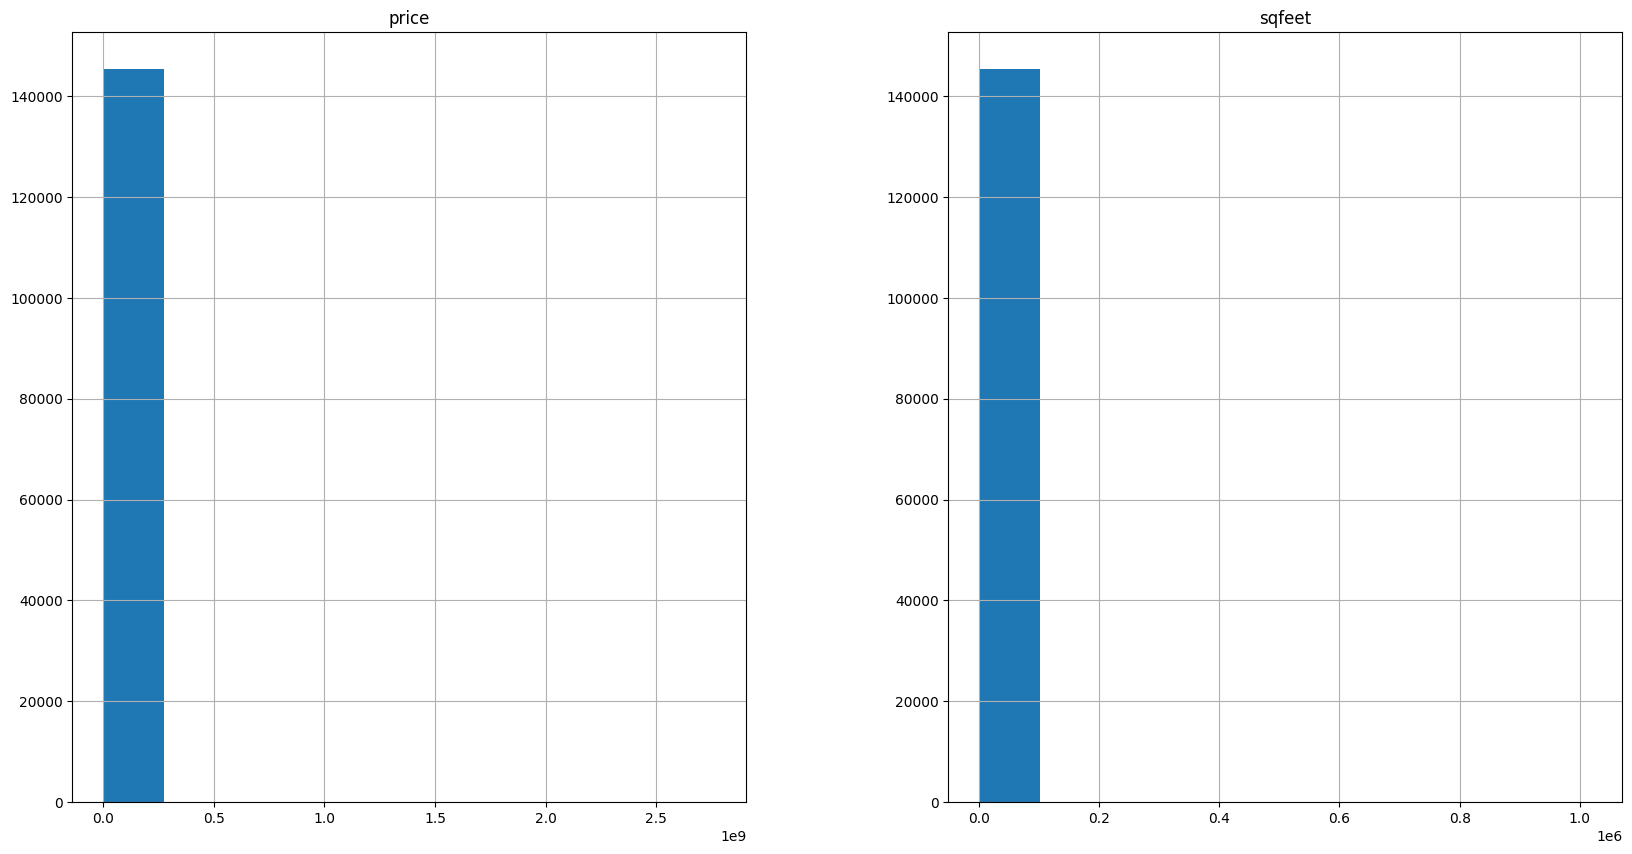

In [33]:
# Plot Numerical Variables
%matplotlib inline
house[['price', 'sqfeet']].hist(figsize=(20, 10))
plt.plot()

This visualization indicates that certain rental homes have a price listed as 0, along with a square footage of 0. As per zoning regulations, a house must have a minimum square footage of 120, and at least one room must be suitable for habitation. Therefore, we need to eliminate these outliers from the dataset.

In [34]:
house.beds.value_counts()

beds
2.0       64968
1.0       45398
3.0       25010
4.0        4766
0.0        4309
5.0         880
6.0          77
7.0          25
8.0          13
1100.0        2
1000.0        1
Name: count, dtype: int64

In [35]:
house.baths.value_counts()

baths
1.0     75743
2.0     51262
1.5      9180
2.5      4342
3.0      2617
0.0       943
4.0       810
3.5       398
4.5        68
5.0        51
5.5        18
6.0         7
7.0         3
6.5         2
75.0        2
8.5         1
35.0        1
7.5         1
Name: count, dtype: int64

The majority of homes typically feature up to 3 bedrooms and 3 bathrooms. Hence, we should exclude properties with more than 4 bedrooms or 4 bathrooms. Additionally, considering that a typical 4-bedroom home ranges from approximately 2000 to 5000 square feet, we can filter out rental properties exceeding 5000 square feet in size.

# Removing Outliers

In [36]:
# Square feet outliers removal
house.query('sqfeet<120 or sqfeet>5000')

,region,price,type,sqfeet,beds,baths,comes_furnished,laundry_options,parking_options,state,pets_allowed
546,reno,817.0,apartment,70.0,1.0,1.0,0.0,1,0,ca,1
625,reno,1995.0,other,17951.0,3.0,2.0,0.0,1,1,ca,0
929,reno,1950.0,other,5081.0,3.0,2.5,0.0,1,1,ca,0
2134,sacramento,2025.0,apartment,13.0,3.0,2.0,0.0,1,1,ca,0
3481,sacramento,5500.0,other,5282.0,6.0,5.0,0.0,1,0,ca,0
...,...,...,...,...,...,...,...,...,...,...,...
143618,worcester,4900.0,other,5554.0,5.0,4.5,0.0,1,1,ma,0
143691,worcester,950.0,apartment,100.0,2.0,1.0,0.0,1,1,ma,0
144178,ann arbor,1300.0,other,100.0,1.0,1.0,1.0,1,1,mi,0
145074,ann arbor,1200.0,other,0.0,1.0,1.5,1.0,1,1,mi,1


In [37]:
house = house.query('sqfeet>=120 and sqfeet<=5000')
house.shape

(144964, 11)

In [38]:
# remove home with more than 4 bedrooms and 4 bathrooms
house.query('beds>4 or baths>4')

,region,price,type,sqfeet,beds,baths,comes_furnished,laundry_options,parking_options,state,pets_allowed
107,reno,1125.0,apartment,1939.0,5.0,2.5,0.0,0,0,ca,0
930,reno,2495.0,other,3300.0,5.0,3.0,0.0,1,1,ca,0
1266,reno,3900.0,other,3744.0,4.0,4.5,0.0,1,1,ca,1
1337,sacramento,1475.0,apartment,916.0,2.0,5.0,0.0,1,1,ca,1
1407,sacramento,2900.0,other,2900.0,7.0,3.0,0.0,1,1,ca,0
...,...,...,...,...,...,...,...,...,...,...,...
144956,ann arbor,4000.0,apartment,1650.0,5.0,2.0,1.0,1,1,mi,0
145071,ann arbor,900.0,other,2449.0,5.0,2.0,0.0,0,0,mi,1
145234,ann arbor,4950.0,other,1460.0,6.0,2.0,1.0,1,1,mi,0
145235,ann arbor,4175.0,other,1379.0,5.0,2.0,1.0,1,1,mi,0


In [39]:
house = house.query('beds<=4 and baths<=4')
house.shape

(143943, 11)

In [40]:
house.query('beds == 0 and baths ==0')

,region,price,type,sqfeet,beds,baths,comes_furnished,laundry_options,parking_options,state,pets_allowed


In [41]:
# remove the price outliers by region using one standard deviation
def remove_price_outliers(house):
    df_out = pd.DataFrame()
    for key, subdf in house.groupby('region'):
        m = np.mean(subdf.price)
        st = np.std(subdf.price)
        reduced_df = subdf[(subdf.price>(m-st)) & (subdf.price<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

house=remove_price_outliers(house)
house.shape

(120849, 11)

In [42]:
house.price.describe()

count    120849.000000
mean       1227.193564
std         567.256586
min           0.000000
25%         850.000000
50%        1100.000000
75%        1449.000000
max       13000.000000
Name: price, dtype: float64

In [43]:
q_high,q_low = house.price.quantile(0.999),house.price.quantile(0.001)
q_high,q_low

(4944.9120000000985, 311.87199999999996)

Approximately 99.8% of the rental property prices in the dataset range from 150 to 4395. Hence, we can eliminate prices below 100 and above 5000.

In [44]:
house = house.query('price>100 and price<5000').copy()

[]

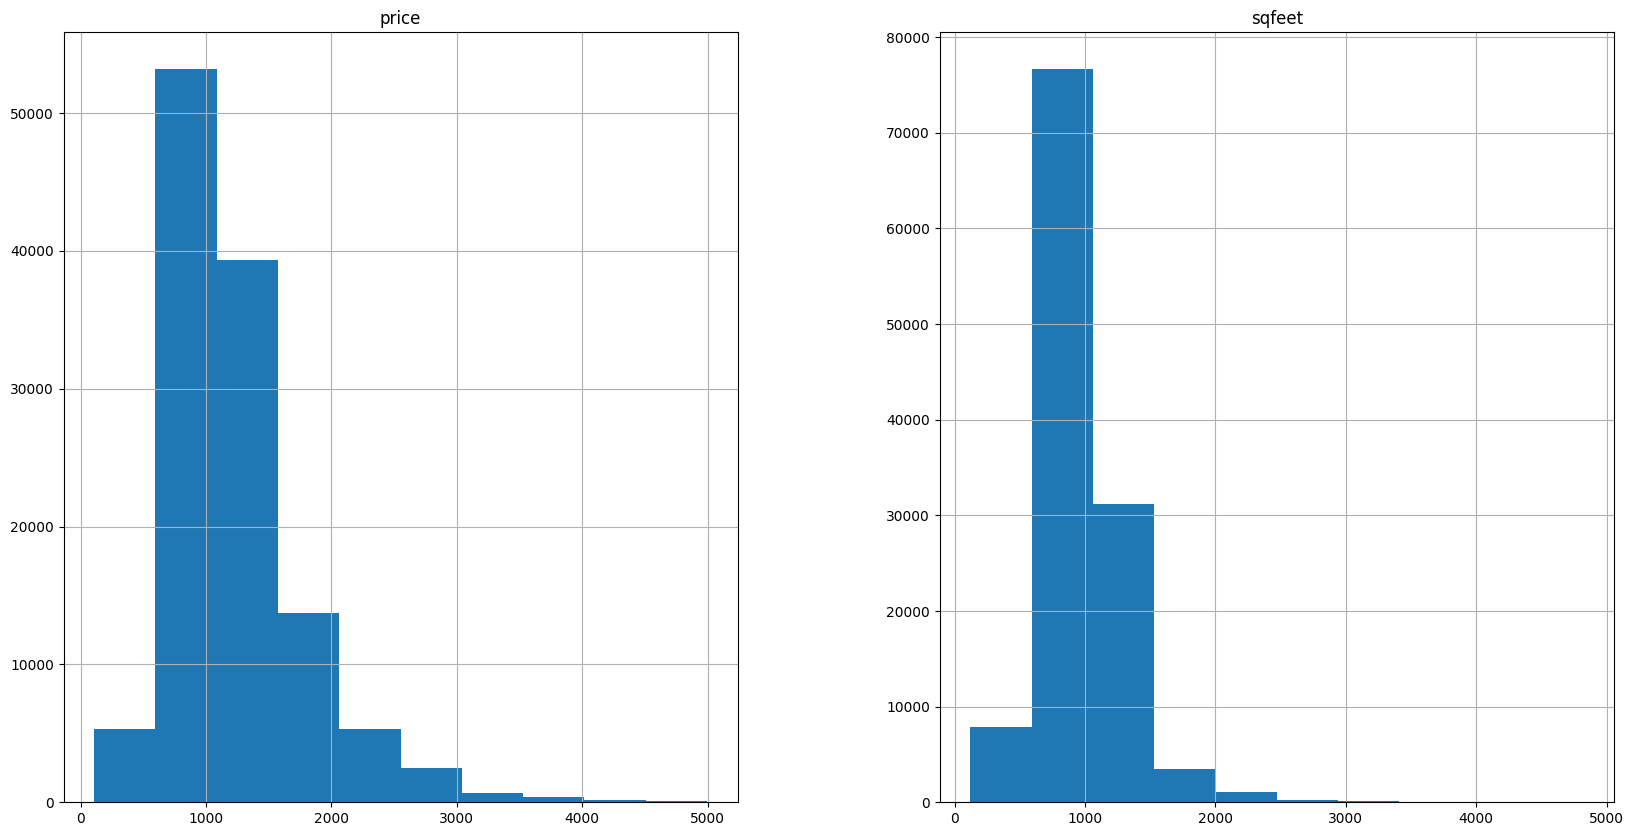

In [45]:
%matplotlib inline
house[['price','sqfeet']].hist(figsize=(20,10))
plt.plot()

The distribution of price and square footage data follows a normal distribution pattern. The majority of rental house prices fall within the range of 500 to 2000.

# Features Relationship

In [46]:
house.parking_options = house.parking_options.astype(int)
house.parking_options.dtypes
house.head()

,region,price,type,sqfeet,beds,baths,comes_furnished,laundry_options,parking_options,state,pets_allowed
0,SF bay area,1650.0,apartment,325.0,1.0,1.0,0.0,0,1,ca,0
1,SF bay area,1495.0,other,500.0,1.0,1.0,0.0,0,0,ca,0
2,SF bay area,2900.0,other,1258.0,3.0,2.0,0.0,1,1,ca,1
3,SF bay area,3400.0,apartment,850.0,2.0,1.0,0.0,1,1,ca,0
4,SF bay area,1895.0,other,500.0,2.0,1.0,0.0,0,0,ca,0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

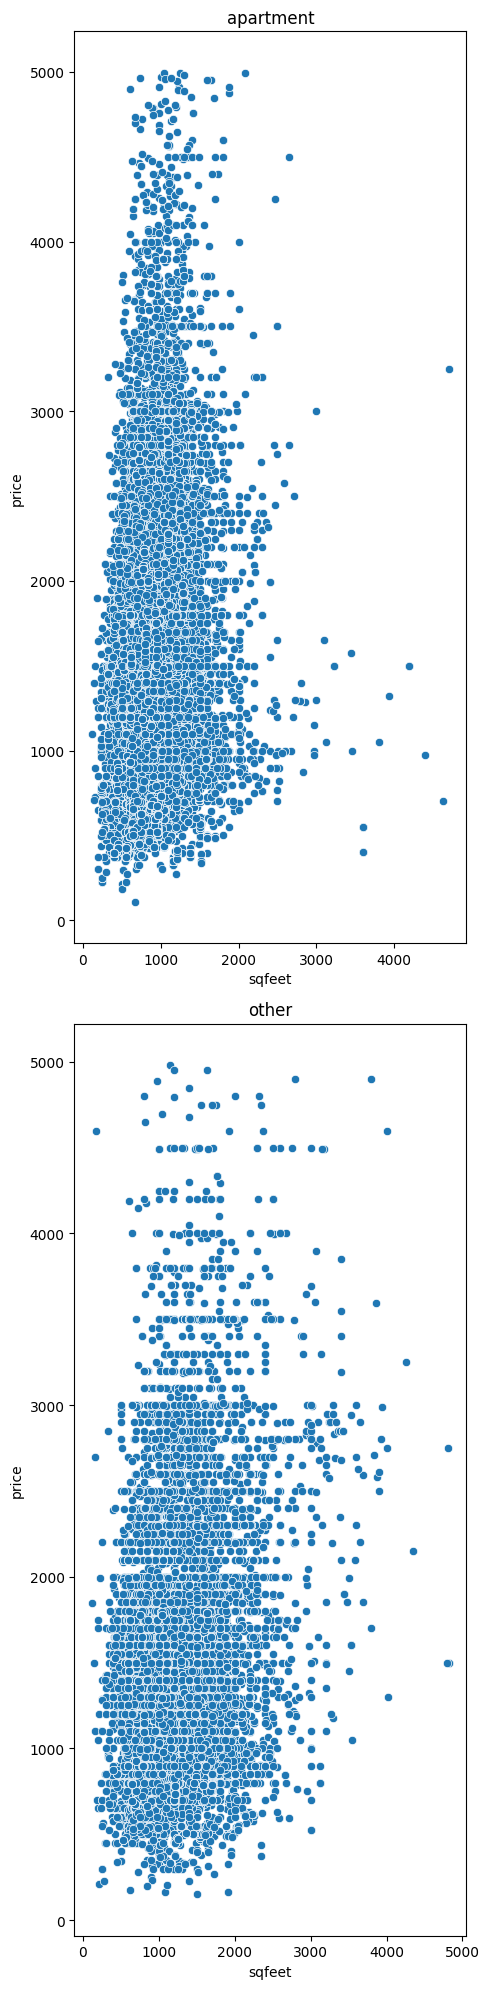

In [47]:
# create a new figure to hold the subplots
fig, axes = plt.subplots(nrows=len(house['type'].unique()), figsize=(5,20))

# loop through each unique state and create a scatterplot on its own subplot
for i, (key, subdf) in enumerate(house.groupby('type')):
    sns.scatterplot(x=subdf.sqfeet, y=subdf.price, ax=axes[i])
    axes[i].set_title(key)  # set the title to the name of the state
    
# display the plots
plt.tight_layout()
plt.show()

# Data Correlation

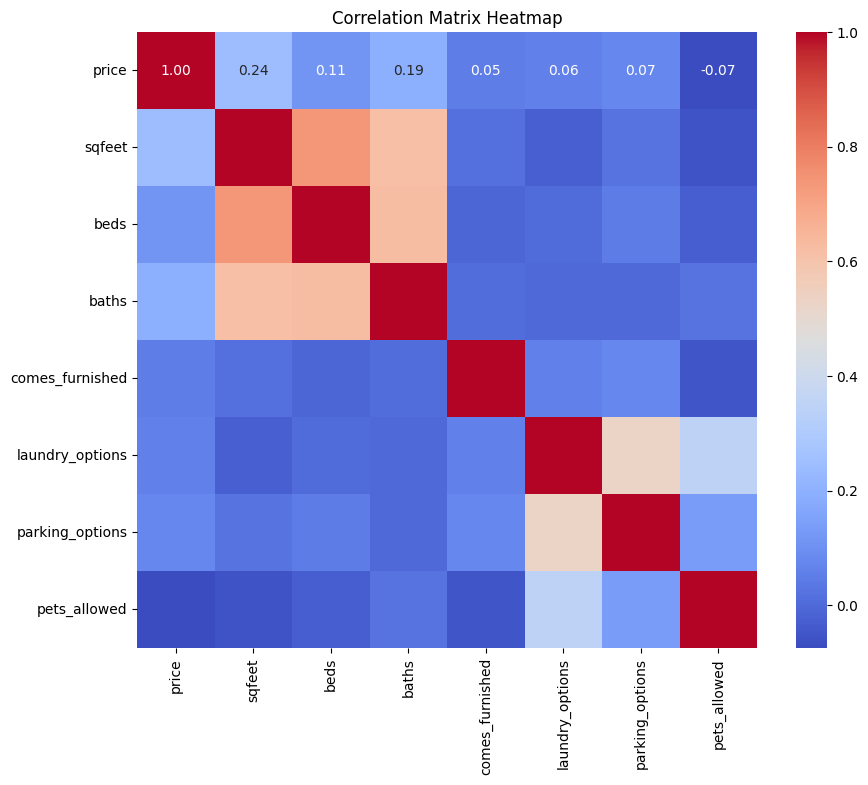

In [48]:
numerical_cols= ['price','sqfeet', 'beds', 'baths',
                 'comes_furnished', 'laundry_options',
                 'parking_options', 'pets_allowed']
# Select only the numerical columns from 'house'
numeric_cols = house[numerical_cols]

# Calculate the correlation matrix for the selected numerical columns
correlation = numeric_cols.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

Bedrooms and square footage exhibit a strong positive correlation, while baths and bedrooms also show a positive correlation.

# Label Encoding With OneHOtEncoding

In [49]:
house.head()

,region,price,type,sqfeet,beds,baths,comes_furnished,laundry_options,parking_options,state,pets_allowed
0,SF bay area,1650.0,apartment,325.0,1.0,1.0,0.0,0,1,ca,0
1,SF bay area,1495.0,other,500.0,1.0,1.0,0.0,0,0,ca,0
2,SF bay area,2900.0,other,1258.0,3.0,2.0,0.0,1,1,ca,1
3,SF bay area,3400.0,apartment,850.0,2.0,1.0,0.0,1,1,ca,0
4,SF bay area,1895.0,other,500.0,2.0,1.0,0.0,0,0,ca,0


In [50]:
dummies1 = pd.get_dummies(house.region)
dummies2 = pd.get_dummies(house.type)
dummies3 = pd.get_dummies(house.state)
new_house = pd.concat([house,dummies1,dummies2,dummies3], axis = 'columns').drop(['region','type','state'], axis = 'columns')

In [51]:
new_house.head()

,price,sqfeet,beds,baths,comes_furnished,laundry_options,parking_options,pets_allowed,SF bay area,albany,ames,ann arbor,annapolis,athens,atlanta,augusta,baltimore,baton rouge,battle creek,bloomington,bloomington-normal,boise,boston,boulder,bowling green,brunswick,cape cod,cedar rapids,central louisiana,champaign urbana,chicago,colorado springs,columbus,cumberland valley,daytona beach,decatur,delaware,denver,des moines,detroit metro,dubuque,east idaho,eastern CO,eastern CT,eastern kentucky,eastern shore,evansville,flint,florida keys,fort collins,fort dodge,fort wayne,frederick,ft myers,gainesville,grand rapids,hartford,hawaii,heartland florida,high rockies,holland,houma,huntington-ashland,indianapolis,iowa city,jacksonville,kalamazoo,"kansas city, MO",kokomo,la salle co,lafayette,lake charles,lakeland,lansing,lawrence,lewiston,lexington,louisville,macon,maine,manhattan,mason city,mattoon-charleston,monroe,muncie,muskegon,new haven,new orleans,north central FL,northwest CT,northwest GA,northwest KS,ocala,okaloosa,omaha,orlando,owensboro,panama city,pensacola,peoria,pueblo,pullman,"quad cities, IA",reno,richmond,rockford,sacramento,saginaw-midland-baycity,salina,san diego,san luis obispo,santa barbara,santa maria,sarasota-bradenton,savannah,shreveport,sioux city,siskiyou county,south bend,south coast,south florida,southeast IA,southeast KS,southern illinois,southern maryland,southwest KS,space coast,spokane,springfield,st augustine,"st louis, MO",statesboro,stockton,susanville,tallahassee,tampa bay area,terre haute,topeka,treasure coast,twin falls,valdosta,ventura county,visalia-tulare,"washington, DC",waterloo,western IL,western KY,western maryland,western massachusetts,western slope,wichita,worcester,yuba-sutter,apartment,other,ca,co,ct,dc,de,fl,ga,hi,ia,id,il,in,ks,ky,la,ma,md,me,mi
0,1650.0,325.0,1.0,1.0,0.0,0,1,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1495.0,500.0,1.0,1.0,0.0,0,0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2900.0,1258.0,3.0,2.0,0.0,1,1,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

In [52]:
new_house.shape

(120677, 174)

# Build Model

In [53]:
# Splitting the data into features X and target variable Y
X = new_house.drop('price', axis = 'columns')
y = new_house.price
# Scale the features X so that no single feature dominates the learning algorithm
from sklearn.preprocessing import StandardScaler
X_scaled =StandardScaler().fit_transform(X)

In [54]:
# Splitting the data into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [55]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train,y_train)
lr.score(X_test,y_test)

0.7830922752359719

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [57]:
# Make predictions using the trained model on the test set
y_pred = lr.predict(X_test)

In [58]:
print(y_pred)

[1803.46165399 1190.90076309 1407.03681597 ... 1183.9864399   990.83334224
  902.75110601]


In [59]:
# Calculate R-squared for training set
train_score = lr.score(X_train, y_train)

In [60]:
# Calculate R-squared for testing set
test_score = lr.score(X_test, y_test)

In [61]:
print("Training R-squared score:", train_score)
print("Testing R-squared score:", test_score)

Training R-squared score: 0.7761809303766418
Testing R-squared score: 0.7830922752359719


In [62]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

In [63]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

In [64]:
# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [65]:
# Calculate Adjusted R-squared
n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of features
r_squared = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

In [66]:
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Adjusted R-squared:", adjusted_r2)

Mean Absolute Error (MAE): 168.70313439898794
Mean Squared Error (MSE): 64811.26787056856
Root Mean Squared Error (RMSE): 254.58057245314018
Adjusted R-squared: 0.7815262525173267


In [67]:
ab_percentage = np.abs((y_test-y_pred) / y_test) * 100

In [68]:
mape = np.mean(ab_percentage)

In [69]:
print(mape)

14.36411115257099


In [70]:
# Decision Tree regressor
from sklearn.tree import DecisionTreeRegressor
d_regressor= DecisionTreeRegressor().fit(X_train, y_train)
d_regressor.score(X_test, y_test)

0.8396861769848003

In [71]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
score = cross_val_score(LinearRegression(), X,y,cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=0))

In [72]:
score.mean()

0.7748996722776536

# Random Forest

In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, ShuffleSplit

In [74]:
## Training model and analyzing the results

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer


# Droping non-numeric columns, such as URLs, from the dataset
house_numeric = house.select_dtypes(include=['number'])

# Defining feature variables (X) and target variable (y)
X = house_numeric.drop('price', axis=1)
y = house_numeric['price']

# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Define the RandomForestRegressor model
ran = RandomForestRegressor(n_estimators=90)

# Train the RandomForestRegressor model
ran.fit(X_train_imputed, y_train)

# Make predictions on the testing data using RandomForestRegressor
ran_predictions = ran.predict(X_test_imputed)

# Evaluate RandomForestRegressor model's performance
ran_mse = mean_squared_error(y_test, ran_predictions)
ran_mae = mean_absolute_error(y_test, ran_predictions)
ran_r2 = r2_score(y_test, ran_predictions)

# Print performance metrics for RandomForestRegressor
print("Random Forest Regressor Metrics:")
print("Mean Squared Error:", ran_mse)
print("Mean Absolute Error:", ran_mae)
print("R-squared:", ran_r2)

# Define the Linear Regression model
lin = LinearRegression()

# Train the Linear Regression model
lin.fit(X_train_imputed, y_train)

# Make predictions on the testing data using Linear Regression
lin_predictions = lin.predict(X_test_imputed)

# Evaluate Linear Regression model's performance
lin_mse = mean_squared_error(y_test, lin_predictions)
lin_mae = mean_absolute_error(y_test, lin_predictions)
lin_r2 = r2_score(y_test, lin_predictions)

# Print performance metrics for Linear Regression
print("\nLinear Regression Metrics:")
print("Mean Squared Error:", lin_mse)
print("Mean Absolute Error:", lin_mae)
print("R-squared:", lin_r2)

Random Forest Regressor Metrics:
Mean Squared Error: 187626.67798759698
Mean Absolute Error: 257.65745810500243
R-squared: 0.37585771819938274

Linear Regression Metrics:
Mean Squared Error: 272203.4964708492
Mean Absolute Error: 381.8658649667468
R-squared: 0.09451196800141137


In [76]:
# Define a function to calculate accuracy within a tolerance range
def calculate_accuracy(y_true, y_pred, tolerance):
    correct_count = np.sum(np.abs(y_true - y_pred) <= tolerance)
    total_count = len(y_true)
    accuracy = correct_count / total_count
    return accuracy

# Define the tolerance range (for example, within $1000)
tolerance = 1000

# Calculate accuracy for RandomForestRegressor
ran_accuracy = calculate_accuracy(y_test, ran_predictions, tolerance)

# Calculate accuracy for Linear Regression
lin_accuracy = calculate_accuracy(y_test, lin_predictions, tolerance)

# Print accuracy scores
print("Random Forest Regressor Accuracy:", ran_accuracy)
print("Linear Regression Accuracy:", lin_accuracy)

Random Forest Regressor Accuracy: 0.9570489448679704
Linear Regression Accuracy: 0.9434592862667108


# XGBoost - Model Training

In [77]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [78]:
# Extreme Gradient Boosting (XGBoost) is an open-source library that provides an efficient and effective implementation of the gradient boosting algorithm.
# Use the scikit-learn wrapper classes: XGBRegressor and XGBClassifier. 

# try another machine learning algorithm : XGBoost
from xgboost import XGBRegressor

xgb_model = XGBRegressor()

In [79]:
# Train the model using the training sets
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [80]:
#run the predictions on the training and testing data
y_xgb_pred_test = xgb_model.predict(X_test)


In [81]:
#compare the actual values (ie, target) with the values predicted by the model
xgb_pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_xgb_pred_test})

xgb_pred_test_df

,Actual,Predicted
119611,1940.0,1725.291870
75296,1500.0,1549.708862
102494,1898.0,1473.295166
45786,1500.0,1166.786865
27615,1159.0,1426.329712
...,...,...
39232,1385.0,1115.603516
67289,1000.0,1193.002808
31745,2377.0,1634.492554
94450,589.0,846.241394


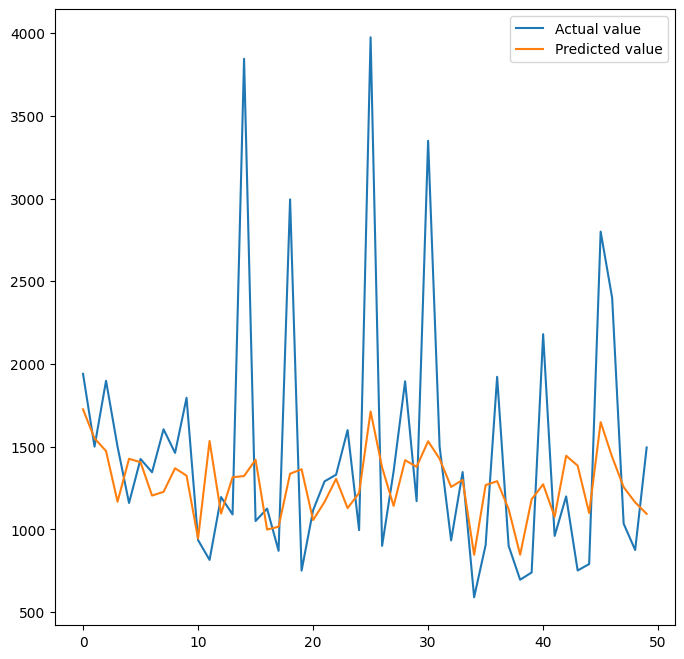

In [82]:
fig= plt.figure(figsize=(8,8))
xgb_pred_test_df = xgb_pred_test_df.reset_index()
xgb_pred_test_df = xgb_pred_test_df.drop(['index'],axis=1)
plt.plot(xgb_pred_test_df[:50])
plt.legend(['Actual value','Predicted value'])

In [83]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_xgb_pred_test)

print("R^2 - {}%".format(round(score, 2) *100))

R^2 - 27.0%


In [84]:
# Determine mean square error and root mean square error
from sklearn.metrics import mean_squared_error
import math

mse = mean_squared_error(y_test, y_xgb_pred_test)
rmse = math.sqrt(mean_squared_error(y_test, y_xgb_pred_test))

print(mse)
print(rmse)

220324.1675362114
469.38701253465825


In [85]:
# Calculate mean absolute error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, y_xgb_pred_test))

326.5306649061082
